In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import seaborn as sns 
import numpy as np
import tensorflow as tf
#installed necessary libraries and imported them


In [4]:
df = pd.read_csv(r"C:\Users\aduka\Downloads\Rel Ind (5).csv")
#Historical prices of Reliance Ind. over the last 5 years

In [5]:
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,20-07-2018,1110.50,1138.25,1110.50,1128.55,1125.24,446801,12094,502759907.0,109831.0,24.58,27.75,18.05
1,23-07-2018,1129.70,1130.00,1114.00,1120.15,1119.63,205750,4704,230363644.0,69915.0,33.98,16.00,-9.55
2,24-07-2018,1122.00,1126.10,1107.65,1110.55,1115.07,305391,5790,340531123.0,135804.0,44.47,18.45,-11.45
3,25-07-2018,1112.25,1122.30,1104.55,1114.05,1116.14,265010,5802,295787919.0,102790.0,38.79,17.75,1.80
4,26-07-2018,1113.00,1121.00,1107.70,1110.35,1114.83,154028,4490,171715377.0,60309.0,39.15,13.30,-2.65


In [6]:
df.tail()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
1232,14-07-2023,2751.05,2760.8,2723.75,2738.9,2738.69,499323,26100,1.367493e+09,170719.0,34.19,37.05,-12.15
1233,17-07-2023,2746.70,2816.0,2728.55,2796.4,2780.31,453640,21402,1.261261e+09,256190.0,56.47,87.45,49.70
1234,18-07-2023,2812.05,2838.0,2794.00,2822.4,2813.55,364444,19866,1.025382e+09,200000.0,54.88,44.00,10.35
1235,19-07-2023,2832.00,2855.0,2796.45,2840.0,2825.84,782335,43098,2.210751e+09,417880.0,53.41,58.55,8.00
1236,20-07-2023,2589.00,2632.0,2582.00,2619.8,2614.32,400680,17951,1.047507e+09,177445.0,44.29,50.00,30.80


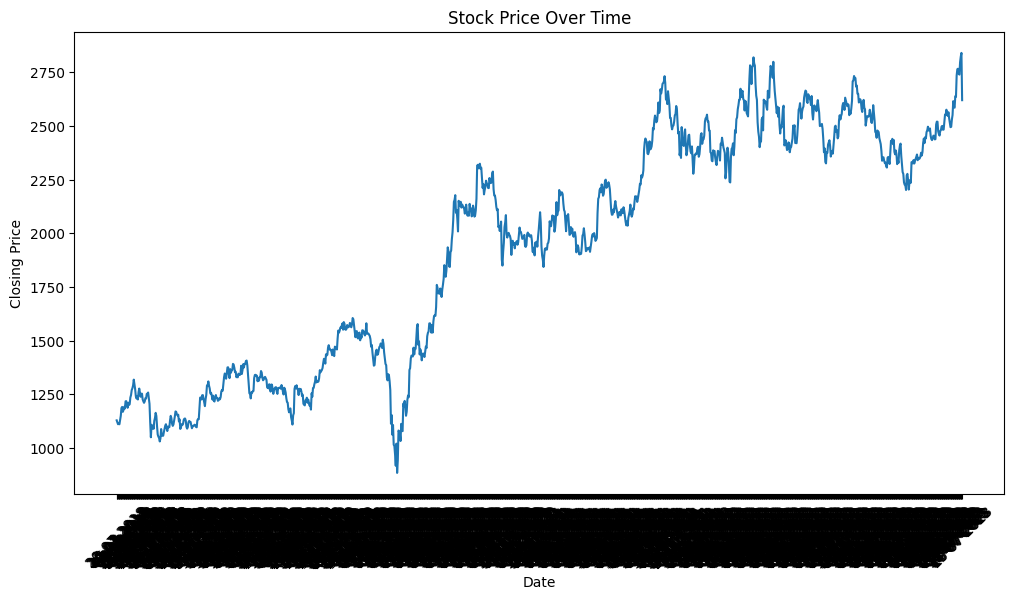

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)   #to avoid overlapping and improve readability if the date labels are long.
plt.show()

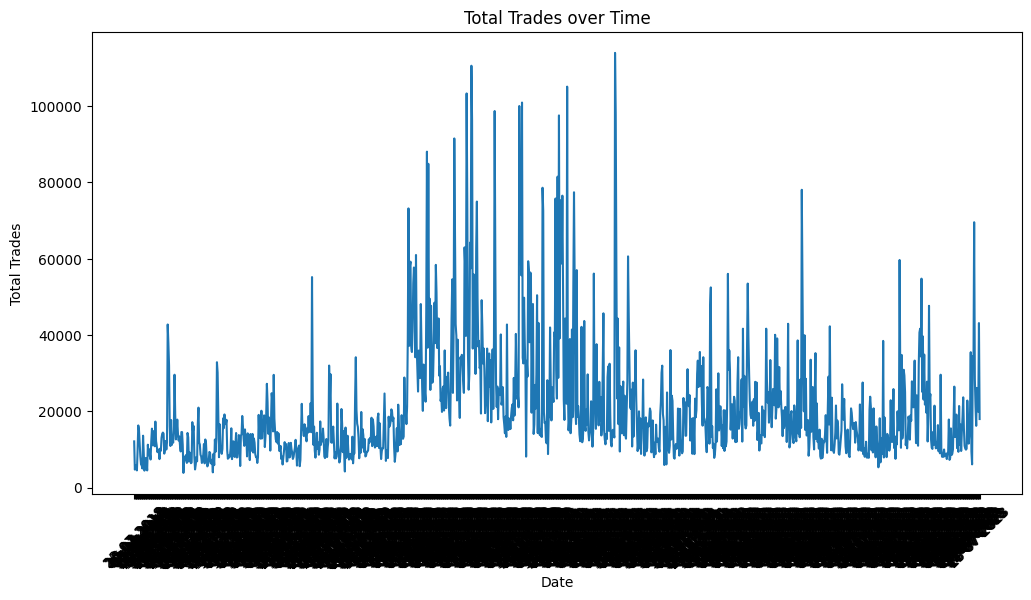

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='No. of Trades')
plt.title('Total Trades over Time')
plt.xlabel('Date')
plt.ylabel('Total Trades')
plt.xticks(rotation=45)
plt.show()

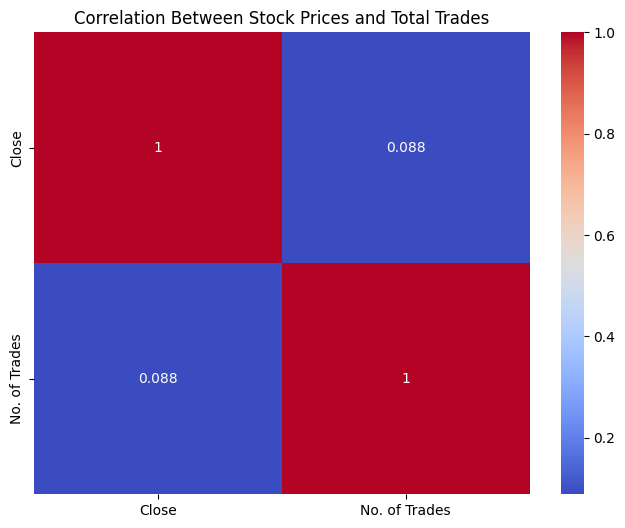

In [19]:
# Assuming 'Close' and 'Total Trades' are columns in the DataFrame df
correlation_matrix = df[['Close', 'No. of Trades']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and Total Trades')
plt.show()

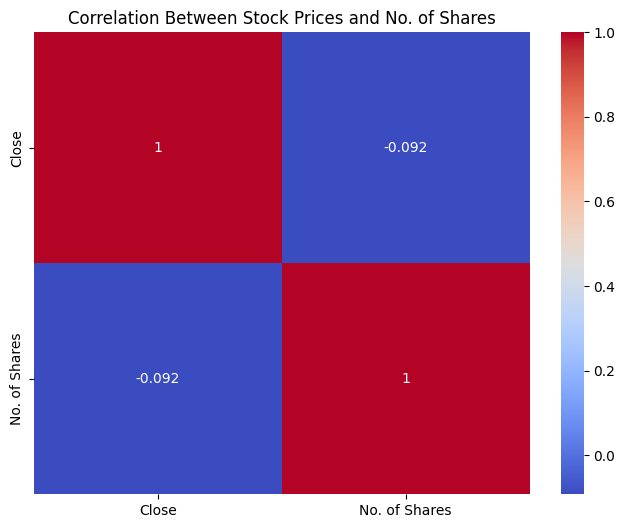

In [22]:
correlation_matrix = df[['Close', 'No. of Shares']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Stock Prices and No. of Shares')
plt.show()

In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       1128.55
1       1120.15
2       1110.55
3       1114.05
4       1110.35
         ...   
1232    2738.90
1233    2796.40
1234    2822.40
1235    2840.00
1236    2619.80
Name: Close, Length: 1237, dtype: float64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.12509266],
       [0.12079851],
       [0.11589091],
       ...,
       [0.99100273],
       [1.        ],
       [0.88743195]])

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size


(804, 433)

In [12]:
#Data preprocessing
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
time_step = 75
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)
#(Number of records,time_step)

(728, 75)
(728,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(357, 75)
(357,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(75, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))


model.compile(loss='mean_squared_error', optimizer='adam')


model.summary()





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 75, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 75, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
12/12 [==============================] - 10s 291ms/step - loss: 0.0626 - val_loss: 0.0386
Epoch 2/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0109 - val_loss: 0.0030
Epoch 3/100
12/12 [==============================] - 2s 151ms/step - loss: 0.0056 - val_loss: 0.0137
Epoch 4/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0036 - val_loss: 0.0031
Epoch 5/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0028 - val_loss: 0.0032
Epoch 6/100
12/12 [==============================] - 2s 161ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 7/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 8/100
12/12 [==============================] - 2s 175ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 9/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 10/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0024 - val_l

Epoch 81/100
12/12 [==============================] - 2s 152ms/step - loss: 7.8059e-04 - val_loss: 9.9982e-04
Epoch 82/100
12/12 [==============================] - 2s 151ms/step - loss: 8.3020e-04 - val_loss: 0.0010
Epoch 83/100
12/12 [==============================] - 2s 158ms/step - loss: 7.4928e-04 - val_loss: 0.0012
Epoch 84/100
12/12 [==============================] - 2s 155ms/step - loss: 7.2146e-04 - val_loss: 9.0674e-04
Epoch 85/100
12/12 [==============================] - 2s 154ms/step - loss: 6.9691e-04 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 2s 157ms/step - loss: 7.0669e-04 - val_loss: 0.0011
Epoch 87/100
12/12 [==============================] - 2s 155ms/step - loss: 7.8029e-04 - val_loss: 9.0385e-04
Epoch 88/100
12/12 [==============================] - 2s 152ms/step - loss: 7.1340e-04 - val_loss: 0.0011
Epoch 89/100
12/12 [==============================] - 2s 153ms/step - loss: 6.5666e-04 - val_loss: 8.8951e-04
Epoch 90/100
12/12 [==========

In [20]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


12/12 [==============================] - 0s 30ms/step


In [21]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.027342221094185385

In [22]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.039169289711583566

In [23]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


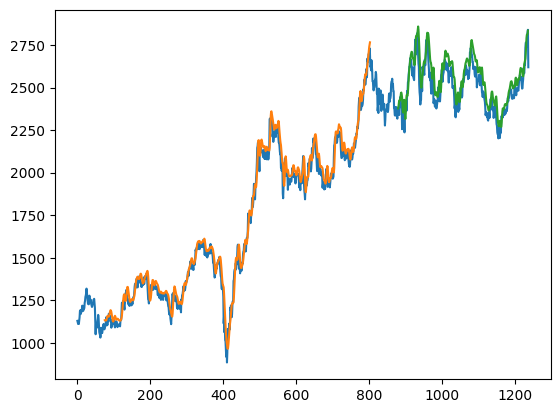

In [24]:
look_back=75
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [43]:
len(test_data)

433

In [44]:
x_input=test_data[283:].reshape(1,-1)#Predicting with the help of previous 100 days
x_input.shape

(1, 150)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
from numpy import array

lst_output=[]
n_steps=150
i=0
while(i<10):
    
    if(len(temp_input)>150):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[1.0025636]
151
1 day input [0.88492703 0.86644685 0.85946885 0.87731002 0.88812208 0.86933517
 0.86601232 0.82698157 0.8387138  0.84921913 0.8489124  0.84794111
 0.85082944 0.8646065  0.85532807 0.83546763 0.83309051 0.84523171
 0.87554635 0.85581372 0.83922501 0.81192649 0.80949825 0.79791938
 0.81522378 0.81320451 0.81141528 0.79689697 0.79020014 0.78281318
 0.76635227 0.74324566 0.75017253 0.75150167 0.74339902 0.73764793
 0.73879815 0.72982644 0.72696368 0.75042814 0.75226849 0.74252997
 0.73557754 0.76351507 0.79045574 0.7902257  0.79544002 0.78288986
 0.79270506 0.764333   0.75847967 0.76780922 0.75927204 0.73516857
 0.74605731 0.7381847  0.76742581 0.7790558  0.78404008 0.75469673
 0.73578202 0.71622831 0.71193416 0.69166475 0.6861437  0.68461008
 0.67364466 0.70863686 0.71201084 0.69713468 0.67461595 0.69199703
 0.69733916 0.69084682 0.73982057 0.74017841 0.73698336 0.74490709
 0.73652327 0.74250441 0.74766761 0.75239629 0.75809626 0.74442144
 0.75035146 0.74730977 0.74894563 

6 day output [[1.0742713]]
7 day input [0.86601232 0.82698157 0.8387138  0.84921913 0.8489124  0.84794111
 0.85082944 0.8646065  0.85532807 0.83546763 0.83309051 0.84523171
 0.87554635 0.85581372 0.83922501 0.81192649 0.80949825 0.79791938
 0.81522378 0.81320451 0.81141528 0.79689697 0.79020014 0.78281318
 0.76635227 0.74324566 0.75017253 0.75150167 0.74339902 0.73764793
 0.73879815 0.72982644 0.72696368 0.75042814 0.75226849 0.74252997
 0.73557754 0.76351507 0.79045574 0.7902257  0.79544002 0.78288986
 0.79270506 0.764333   0.75847967 0.76780922 0.75927204 0.73516857
 0.74605731 0.7381847  0.76742581 0.7790558  0.78404008 0.75469673
 0.73578202 0.71622831 0.71193416 0.69166475 0.6861437  0.68461008
 0.67364466 0.70863686 0.71201084 0.69713468 0.67461595 0.69199703
 0.69733916 0.69084682 0.73982057 0.74017841 0.73698336 0.74490709
 0.73652327 0.74250441 0.74766761 0.75239629 0.75809626 0.74442144
 0.75035146 0.74730977 0.74894563 0.7531631  0.76233929 0.75566802
 0.76356619 0.78539478 

In [47]:
day_new=np.arange(1,151)
day_pred=np.arange(151,161)
import matplotlib.pyplot as plt
len(df1)

1237

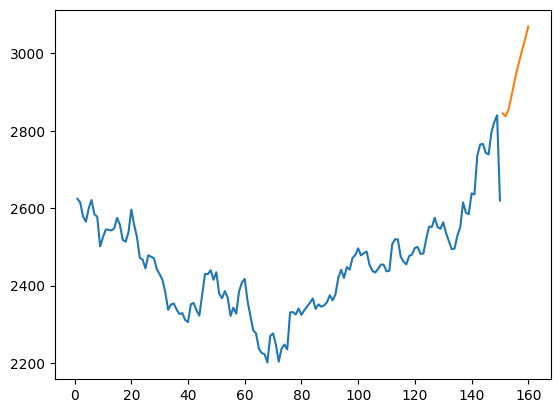

In [49]:
plt.plot(day_new,scaler.inverse_transform(df1[1087:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

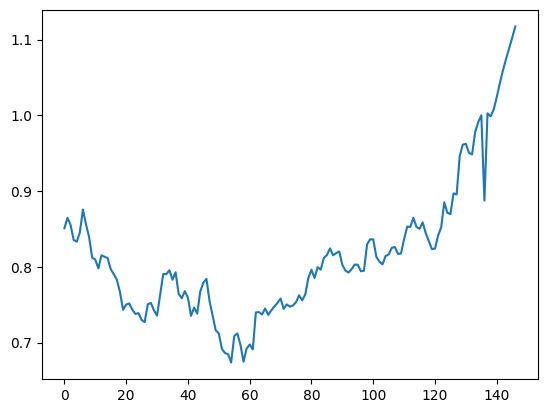

In [50]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])